In [1]:
from geomdl import NURBS
from geomdl.visualization import VisMPL
import numpy as np
from matplotlib import cm

In [2]:
def construct_arc(alpha, z=0, r=1, Wext=1):
    """Simplified from construct_arc_test. Does not display the curve, only returns weighted control points and knot vector"""
    if alpha > 1 or alpha <= 0:
        raise Exception('alpha must be strictly greater than 0 and equal to or less than 1')
    elif r < 0:
        #Circle must have a radius greater than 0
        raise Exception('r must be greater than 0')
    elif 0 < alpha and alpha <= 0.25:
        theta = alpha*2*np.pi
        w = np.cos(theta/2)
        s = 1/np.cos(theta/2)
        
        crv = NURBS.Curve()
        crv.degree = 2
        crv.ctrlptsw = [[Wext*r*1, Wext*r*0, Wext*z, Wext*1],
                        [Wext*r*w*s*np.cos(theta/2), Wext*r*w*s*np.sin(theta/2), Wext*z*w, Wext*w],
                        [Wext*r*np.cos(theta), Wext*r*np.sin(theta), Wext*z, Wext*1]]
        crv.knotvector = [0, 0, 0,  1, 1, 1]
        crv.vis = VisMPL.VisCurve3D()
        return crv.ctrlptsw, crv.knotvector
    
    elif 0.25 < alpha and alpha <= 0.50:
        theta = alpha*2*np.pi
        w = np.cos(theta/4)
        s = 1/np.cos(theta/4)
        
        crv = NURBS.Curve()
        crv.degree = 2
        crv.ctrlptsw = [[Wext*r*1, 0, Wext*z, Wext*1],
                        [Wext*r*w*s*np.cos(theta/4), Wext*r*w*s*np.sin(theta/4), Wext*z*w, Wext*w], 
                        [Wext*r*np.cos(theta/2), Wext*r*np.sin(theta/2), Wext*z, Wext*1],
                        [Wext*r*w*s*np.cos(3*theta/4), Wext*r*w*s*np.sin(3*theta/4), Wext*z*w, Wext*w],
                        [Wext*r*np.cos(theta), Wext*r*np.sin(theta), Wext*z, Wext*1]]
        crv.knotvector = [0, 0, 0, 0.5, 0.5, 1, 1, 1]
        crv.vis = VisMPL.VisCurve3D()
        return crv.ctrlptsw, crv.knotvector
        
    elif 0.5 < alpha and alpha <= 0.75:
        theta = alpha*2*np.pi
        w = np.cos(theta/6)
        s = 1/np.cos(theta/6)
        
        crv = NURBS.Curve()
        crv.degree = 2
        crv.ctrlptsw = [[Wext*r*1, 0, Wext*z, Wext*1],
                        [Wext*r*w*s*np.cos(theta/6), Wext*r*w*s*np.sin(theta/6), Wext*z*w, Wext*w], 
                        [Wext*r*np.cos(theta/3), Wext*r*np.sin(theta/3), Wext*z, Wext*1],
                        [Wext*r*w*s*np.cos(theta/2), Wext*r*w*s*np.sin(theta/2), Wext*z*w, Wext*w],
                        [Wext*r*np.cos(2*theta/3), Wext*r*np.sin(2*theta/3), Wext*z, Wext*1],
                        [Wext*r*w*s*np.cos(5*theta/6), Wext*r*w*s*np.sin(5*theta/6), Wext*z*w, Wext*w],
                        [Wext*r*np.cos(theta), Wext*r*np.sin(theta), Wext*z, Wext*1]]
        crv.knotvector = [0, 0, 0, 1/3, 1/3, 2/3, 2/3, 1, 1, 1]
        crv.vis = VisMPL.VisCurve3D()
        return crv.ctrlptsw, crv.knotvector
    
        
    elif 0.75 < alpha and alpha <= 1:
        theta = alpha*2*np.pi
        w = np.cos(theta/8)
        s = 1/np.cos(theta/8)
        
        crv = NURBS.Curve()
        crv.degree = 2
        crv.ctrlptsw = [[Wext*r*1, 0, Wext*z, Wext*1],
                        [Wext*r*w*s*np.cos(theta/8), Wext*r*w*s*np.sin(theta/8), Wext*z*w, Wext*w], 
                        [Wext*r*np.cos(theta/4), Wext*r*np.sin(theta/4), Wext*z, Wext*1],
                        [Wext*r*w*s*np.cos(3*theta/8), Wext*r*w*s*np.sin(3*theta/8), Wext*z*w, Wext*w],
                        [Wext*r*np.cos(theta/2), Wext*r*np.sin(theta/2), Wext*z, Wext*1],
                        [Wext*r*w*s*np.cos(5*theta/8), Wext*r*w*s*np.sin(5*theta/8), Wext*z*w, Wext*w],
                        [Wext*r*np.cos(3*theta/4), Wext*r*np.sin(3*theta/4), Wext*z, Wext*1],
                        [Wext*r*w*s*np.cos(7*theta/8), Wext*r*w*s*np.sin(7*theta/8), Wext*z*w, Wext*w],
                        [Wext*r*np.cos(theta), Wext*r*np.sin(theta), Wext*z, Wext*1]]
        crv.knotvector = [0, 0, 0, 1/4, 1/4, 2/4, 2/4, 3/4, 3/4, 1, 1, 1]
        crv.vis = VisMPL.VisCurve3D()
        return crv.ctrlptsw, crv.knotvector

# Torus

In [13]:
# Control points
def construct_torus(alpha, x, z, r):
    """
    Constructs a NURBS Torus about the z-axis. The torus is a surface of revolution of a circle.
    The fraction of the revolution is governed by 'alpha'
    The distance from the z-axis (centre of the torus) to the centre of the circle constucting the torus is 'x'
    The height of the torus is 'z'
    The radius of the circle constucting the torus is 'r'
    The output is the rendering of the torus
    """
    #The control points is a lists of lists of lists
    #the first dimension contains the individual circle point lists
    #The first control control point of each circle list (first dimension) forms the 2D circle in the x-y plane
    #The remainder of the control points in each circle list then revolve said circle about the z-axis
    #Each control point is a list on its own
    ctrlpts = [construct_arc(alpha, z, x-r, 1)[0], 
           construct_arc(alpha, z+r, x-r, 0.707)[0],
           construct_arc(alpha, z+r, x, 1)[0],
           construct_arc(alpha, z+r, x+r, 0.707)[0],
           construct_arc(alpha, z, x+r, 1)[0],
           construct_arc(alpha, z-r, x+r, 0.707)[0],
           construct_arc(alpha, z-r, x, 1)[0],
           construct_arc(alpha, z-r, x-r, 0.707)[0], 
           construct_arc(alpha, z, x-r, 1)[0]]

    # Generate surface
    surf = NURBS.Surface()
    #degree of the shape you want to revolve
    surf.degree_u = 2
    #degree of the circles used to construct revolution
    surf.degree_v = 2
    surf.ctrlpts2d = ctrlpts
    #knot vector of the shape you want to revolve
    surf.knotvector_u = [0, 0, 0, 1/4, 1/4, 2/4, 2/4, 3/4, 3/4, 1, 1, 1]
    #knot vector of the circles used to constuct revolution
    surf.knotvector_v = construct_arc(alpha, 0, 1)[1]
    surf.sample_size = 100
    surf.name = 'Torus'
# Visualize surface
    surf.vis = VisMPL.VisSurfTriangle(figure_size=[6,4], axes_equal=False, figure_dpi=144)
    surf.render(colormap=cm.summer)

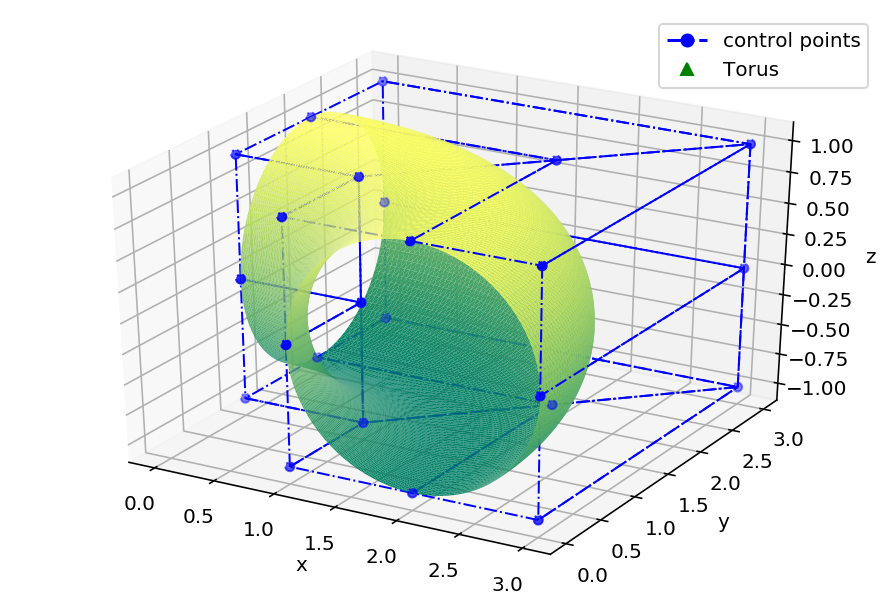

In [14]:
construct_torus(0.25, 2, 0, 1)

# Sphere


In [17]:
# Control points
def construct_sphere(alpha, r):
    """
    Constructs a NURBS Torus about the z-axis. The torus is a surface of revolution of a circle.
    The fraction of the revolution is governed by 'alpha'
    The distance from the z-axis (centre of the torus) to the centre of the circle constucting the torus is 'x'
    The height of the torus is 'z'
    The radius of the circle constucting the torus is 'r'
    The output is the rendering of the torus
    """
    #The control points is a lists of lists of lists
    #the first dimension contains the individual circle point lists
    #The first control control point of each circle list (first dimension) forms the 2D circle in the x-y plane
    #The remainder of the control points in each circle list then revolve said circle about the z-axis
    #Each control point is a list on its own
    ctrlpts = [construct_arc(alpha, r, 0, 1)[0], 
           construct_arc(alpha, r, r, 2**(-0.5))[0],
           construct_arc(alpha, 0, r, 1)[0],
           construct_arc(alpha, -r, r, 2**(-0.5))[0],
           construct_arc(alpha, -r, 0, 1)[0]]
    # Generate surface
    surf = NURBS.Surface()
    #degree of the shape you want to revolve
    surf.degree_u = 2
    #degree of the circles used to construct revolution
    surf.degree_v = 2
    surf.ctrlpts2d = ctrlpts
    #knot vector of the shape you want to revolve
    surf.knotvector_u = [0, 0, 0, 2/4, 2/4, 1, 1, 1]
    #knot vector of the circles used to constuct revolution
    surf.knotvector_v = construct_arc(alpha, 0, 1)[1]
    surf.sample_size = 100
    surf.name = 'Hemisphere' 
    
# Visualize surface
    surf.vis = VisMPL.VisSurfTriangle(figure_size=[6,4], axes_equal=True, figure_dpi=144)
    surf.render(colormap=cm.summer, filename="Hemisphere.pdf", plot=True )
    return surf.evalpts

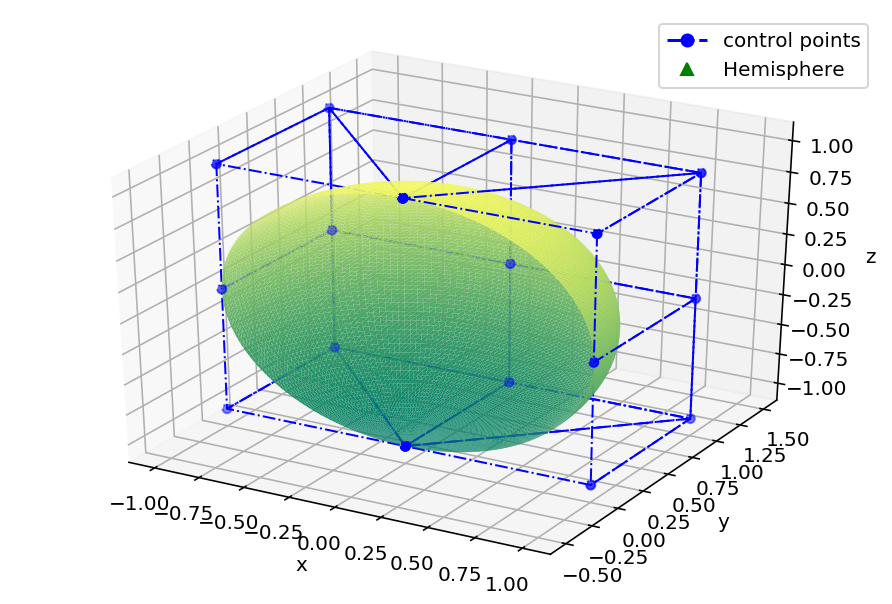

In [18]:
pts = construct_sphere(0.5,1)

# Gabriel's Horn

In [7]:
def construct_horn(alpha, CPoints, Weights, KnotVector):
    """
    Constructs a NURBS Torus about the z-axis. The torus is a surface of revolution of a circle.
    The fraction of the revolution is governed by 'alpha'
    The distance from the z-axis (centre of the torus) to the centre of the circle constucting the torus is 'x'
    The height of the torus is 'z'
    The radius of the circle constucting the torus is 'r'
    The output is the rendering of the torus
    """
    #The control points is a lists of lists of lists
    #the first dimension contains the individual circle point lists
    #The first control control point of each circle list (first dimension) forms the 2D circle in the x-y plane
    #The remainder of the control points in each circle list then revolve said circle about the z-axis
    #Each control point is a list on its own
    ctrlpts = [construct_arc(alpha, CPoints[0][2], CPoints[0][0], Weights[0])[0], 
           construct_arc(alpha, CPoints[1][2], CPoints[1][0], Weights[1])[0],
           construct_arc(alpha, CPoints[2][2], CPoints[2][0], Weights[2])[0]]

    # Generate surface
    surf = NURBS.Surface()
    #degree of the shape you want to revolve
    surf.degree_u = 2
    #degree of the circles used to construct revolution
    surf.degree_v = 2
    surf.ctrlpts2d = ctrlpts
    #knot vector of the shape you want to revolve
    surf.knotvector_u = KnotVector
    #knot vector of the circles used to constuct revolution
    surf.knotvector_v = construct_arc(alpha, 0, 1)[1]
    surf.sample_size = 100

# Visualize surface
    surf.vis = VisMPL.VisSurfTriangle(ctrlpts=False)
    surf.render(colormap=cm.summer)

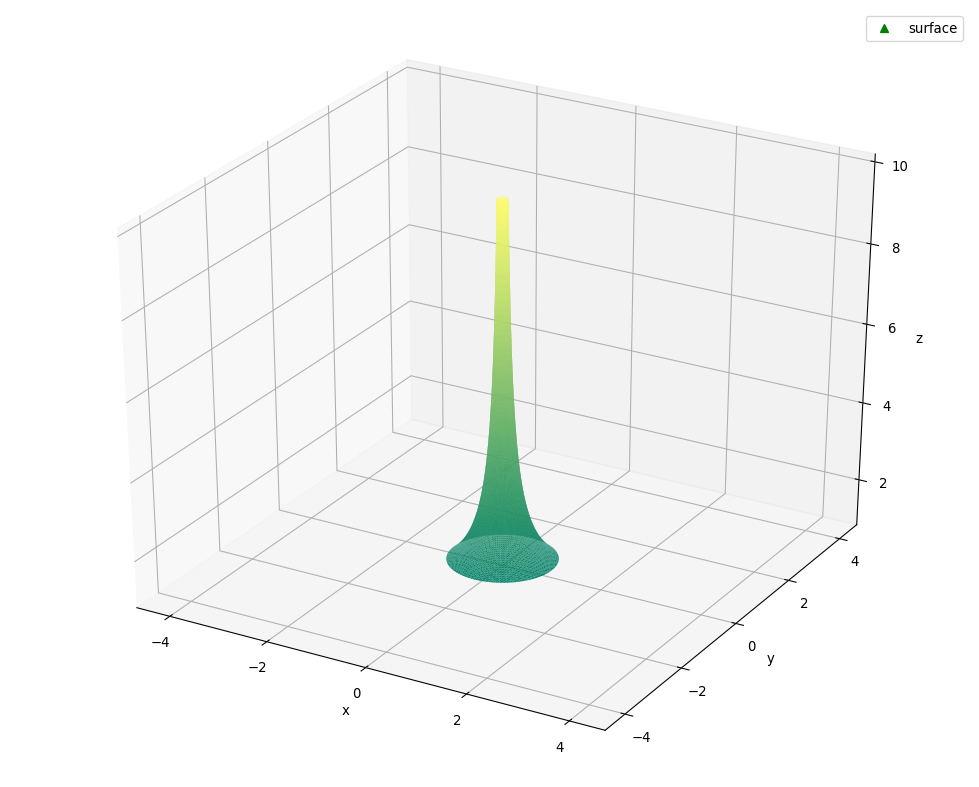

In [8]:
CPoints = np.array([[0.1,0,10],[18/99,0,20/11],[1,0,1]])
Weights = [1,(121/40)**(0.5), 1]
KnotVector = [0, 0, 0,  1, 1, 1]

construct_horn(1, CPoints, Weights, KnotVector)

In [9]:
def construct_hyper(alpha, CPoints, Weights, KnotVector):
    """
    Constructs a NURBS Torus about the z-axis. The torus is a surface of revolution of a circle.
    The fraction of the revolution is governed by 'alpha'
    The distance from the z-axis (centre of the torus) to the centre of the circle constucting the torus is 'x'
    The height of the torus is 'z'
    The radius of the circle constucting the torus is 'r'
    The output is the rendering of the torus
    """
    #The control points is a lists of lists of lists
    #the first dimension contains the individual circle point lists
    #The first control control point of each circle list (first dimension) forms the 2D circle in the x-y plane
    #The remainder of the control points in each circle list then revolve said circle about the z-axis
    #Each control point is a list on its own
    ctrlpts = [construct_arc(alpha, CPoints[0][2], CPoints[0][0], Weights[0])[0], 
           construct_arc(alpha, CPoints[1][2], CPoints[1][0], Weights[1])[0],
           construct_arc(alpha, CPoints[2][2], CPoints[2][0], Weights[2])[0]]

    # Generate surface
    surf = NURBS.Surface()
    #degree of the shape you want to revolve
    surf.degree_u = 2
    #degree of the circles used to construct revolution
    surf.degree_v = 2
    surf.ctrlpts2d = ctrlpts
    #knot vector of the shape you want to revolve
    surf.knotvector_u = KnotVector
    #knot vector of the circles used to constuct revolution
    surf.knotvector_v = construct_arc(alpha, 0, 1)[1]
    surf.sample_size = 100

# Visualize surface
    surf.vis = VisMPL.VisSurfTriangle(ctrlpts=True)
    surf.render(colormap=cm.summer)

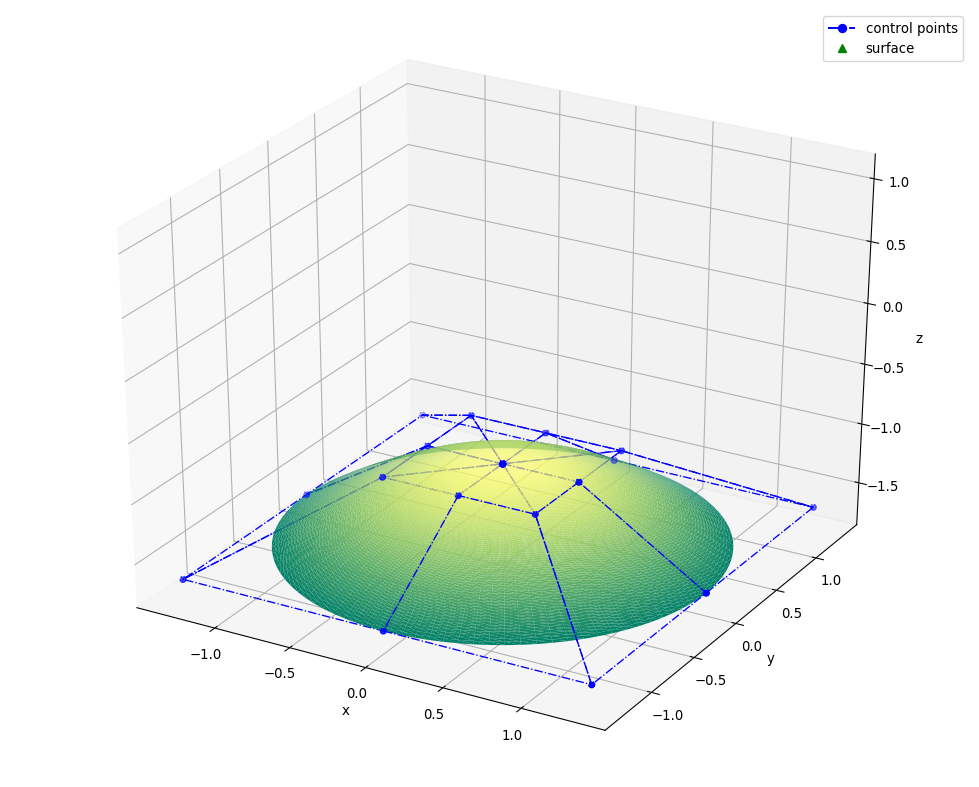

In [10]:
CPoints = np.array([[0,0,-1],[0.5,0,-1],[4/3,0,-5/3]])
Weights = [1,(1/0.75)**(0.5), 1]
KnotVector = [0, 0, 0,  1, 1, 1]

construct_hyper(1, CPoints, Weights, KnotVector)